<a href="https://colab.research.google.com/github/jugernaut/ProgramacionEnParalelo/blob/main/Introduccion/01_TorresHanoi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="Teal" face="Comic Sans MS,arial">
  <h1 align="center"><i>Torres de Hanoi</i></h1>
  </font>
  <font color="Black" face="Comic Sans MS,arial">
  <h5 align="center"><i>Ayudante: Lucía Martínez Rivas</i></h5>
  <h5 align="center"><i>Ayudante: Erick Jesús Rios Gonzalez</i></h5>
  <h5 align="center"><i>correo: zeus@ciencias.unam.mx</i></h5>
  <h5 align="center"><i>Materia: Programación en Paralelo</i></h5>
  </font>

# Torres de Hanoi

El algoritmo para resolver las torres de Hanoi es un ejemplo ampliamente conocido en el contexto computacional.

Es por este motivo que en este documento se parte del hecho que el lector conoce tanto el planteamiento, como el algoritmo iterativo y recursivo.

Dado estos antecedentes procedemos a definir la función de recurrencia, para poder identificar a que orden de complejidad pertenece este algoritmo recursivo.

## Algoritmo recursivo

Para el caso cuando solo se tiene un disco, basta con pasar el disco en cuestión a la pila final. Lo que toma un solo movimiento.

Para el caso de 2 discos, basta con mover el disco 1 (disco de diámetro mas pequeño, D1), a la pila auxiliar y D2 a la pila final. Finalmente D1 a la pila final (sobre D2). Con lo que ya se logro el objetivo y todos los discos están en la pila final. Esto tomo 3 movimientos.

Cuando se tiene 3 discos, caemos en el caso de mover 2 discos a la pila auxiliar, mover un disco a la pila final y por ultimo mover 2 discos de la pila auxiliar a la pila final. Es decir **7 movimientos**, un caso de 2 discos (3 movimientos) más mover un disco, más un caso de 2 discos (3 movimientos).

<center>
<img src="https://github.com/jugernaut/ProgramacionEnParalelo/blob/desarrollo/Imagenes/Introduccion/3discos.gif?raw=1" width="550">
</center>

Para el caso de 4 discos se tiene, un caso de 3 discos (7 movimientos) más un movimiento, mas un caso de 3 discos (7 movimientos), en **total 15 movimientos**.

<center>
<img src="https://github.com/jugernaut/ProgramacionEnParalelo/blob/desarrollo/Imagenes/Introduccion/4discos.gif?raw=1" width="550">
</center>

Podemos ver que se comienza a formar un patrón, o dicho de otra forma podemos pensar que **es posible medir el desempeño** de este algoritmo medíante un polinomio o función.

Veamoslo así, el caso de 3 discos se descompone en 2 casos de 2 discos más un caso de un solo disco. El caso de 4 discos se descompone en 2 casos de 3 discos más un caso de un disco. Podemos imaginar que el caso de 5 discos se descompone en 2 casos de 4 discos más un caso de un disco.

Completa la siguiente tabla y de ser posible define la función $T(n)$ que dado un número de discos $n$, nos devuelva el número de movimientos necesarios para completar la tarea.

| Número de discos | Número de movimientos de discos para cada caso |
| :-:           |           :-:              |
| 1       | $T(1)=1$ |
| 2       | $T(2)=T(1)+T(1)+1=1+1+1=3$ |
| 3       | $T(3)=T(2)+T(2)+1=3+3+1=7$ |
| 4       | $T(4)=T(3)+T(3)+1=7+7+1=15$ |
| 5       | $T(5)=?$ |
| ..      | ........ |
| n       | $T(n)=?$ |


## Código del algoritmo recursivo

Si se programa de manera recursiva, este algoritmo usando un lenguaje de programación, el código se vería de la siguiente manera.

In [ ]:
# Algoritmo recursivo que resuelve el problema de las torres de Hanoi
def torre_Hanoi(discos, torre_Inicial, torre_Auxiliar, torre_Final):
  # caso base
  if(discos <=  1):
    print('Disco ' , str(discos) , " de " , torre_Inicial , " a " , torre_Final)
  # llamadas recursivas
  else:
    torre_Hanoi(discos-1, torre_Inicial, torre_Final, torre_Auxiliar)
    print ('Disco ' , str(discos) , " de " , torre_Inicial , " a " , torre_Final)
    torre_Hanoi(discos-1, torre_Auxiliar, torre_Inicial, torre_Final)
# pruebas
discos = 4
torre_Hanoi(discos, 'torre Inicial', 'torre Auxiliar', 'torre Final')

Disco  1  de  torre Inicial  a  torre Auxiliar
Disco  2  de  torre Inicial  a  torre Final
Disco  1  de  torre Auxiliar  a  torre Final
Disco  3  de  torre Inicial  a  torre Auxiliar
Disco  1  de  torre Final  a  torre Inicial
Disco  2  de  torre Final  a  torre Auxiliar
Disco  1  de  torre Inicial  a  torre Auxiliar
Disco  4  de  torre Inicial  a  torre Final
Disco  1  de  torre Auxiliar  a  torre Final
Disco  2  de  torre Auxiliar  a  torre Inicial
Disco  1  de  torre Final  a  torre Inicial
Disco  3  de  torre Auxiliar  a  torre Final
Disco  1  de  torre Inicial  a  torre Auxiliar
Disco  2  de  torre Inicial  a  torre Final
Disco  1  de  torre Auxiliar  a  torre Final


## Algoritmo iterativo

La versión iterativa de este algoritmo lo podemos ver en la siguiente imagen, tiene ventajas y desventajas pero eso lo comentaremos más adelante.

Una de sus principales desventajas es que por lo general es necesario escribir más código que en la versión recursiva.

<center>
<img src="https://github.com/jugernaut/ManejoDatos/blob/main/Imagenes/Introduccion/hanoiiterativo.png?raw=1" width="1050">
</center>

# Análisis

Dada la descripción básica (y el código del algoritmo) podemos concluir que para $n-discos$ tomará **$T(n-1)$ movimientos**, más **un movimiento**, más **$T(n-1)$ movimientos**.

Lo cual nos lleva a definir la función de recurrencia de la siguiente forma.

Función de recurrencia para el algoritmo de las torres de Hanoi:

$$T(n)=\begin{cases}
1 & n=1\\
2T(n-1)+1 & n\geq2
\end{cases}$$

Con lo que podemos concluir que...

## Demostración

Sea $T(n)$ el número de movimientos que le toma al algoritmo anterior cumplir con su objetivo y dada la función de recurrencia P.D. $T(n)=2^{n}-1$.

$$\begin{eqnarray*}
T(n)	& = &	2T(n-1)+1 \\
	& = &	2(2T(n-2)+1)+1.....Funci\acute{o}n\,de\,recurrencia \\
	& = &	2^{2}T(n-2)+2+1.......Algebra\,elemental \\
	& = &	2^{2}(2T(n-3)+1)+2+1.....Funci\acute{o}n\,de\,recurrencia \\
	& = &	2^{3}T(n-3)+2^{2}+2+1.......Algebra\,elemental \\
k-veces & \vdots & \\
	& = &	2^{k}T(n-k)+2^{k-1}+\cdots+2+1 \\
k=n-1		& \vdots & \\
	& = &	2^{n-1}T(n-(n-1))+2^{n-1-1}+\cdots+2+1 \\
	& = &	2^{n-1}T(1)+2^{n-2}+\cdots+2+1........T(1)=1 \\
	& = &	2^{n-1}+2^{n-2}+\cdots+2^{2}+2+1......(suma\,potencias\,de\,2) \\
	& = &	2^{n}-1......\square \\
\end{eqnarray*}$$

# Cota superior asintótica

La cota superior asintótica (O grande) es una forma de clasificar a los algoritmos de acuerdo a su comportamiento y desempeño.

Se usa en todas las ramas de las ciencias de computación ya que con base en esta medida (y algunas otras) podemos identificar que tan bueno o malo es nuestro algoritmo comparado con otros.


## Definición

Cota superior asintótica: sea $g\left(x\right)$ una función continua y $f\left(x\right)$ la función que describe el comportamiento de nuestro algoritmo, diremos que $f$ pertenece al orden $g$ si.

$$O\left(g\left(x\right)\right)=\left\{ f\left(x\right)\colon\exists\,x_{0},c>0\mid\forall x\geq x_{0}>0\colon0\leq\left|f\left(x\right)\right|\leq c\left|g\left(x\right)\right|\right\} $$

<center>
<img src="https://github.com/jugernaut/ProgramacionEnParalelo/blob/desarrollo/Imagenes/Introduccion/cota.png?raw=1" width="550">
</center>

Como te podrás dar cuenta, la cota superior asintótica nos sirve
para definir categorías (orden de complejidad) dentro del
desempeño de los mucho algoritmos existentes. Y esto sirve
para poder identificar cuales algoritmos son más eficientes que
otros.

| orden de Complejidad        | Nombre            |
| :-:           |    :-:        |
| $O(1) $       | Orden constante |
| $O(log n) $   | Orden logarítmico     |
| $O(n) $       | Orden lineal      |
| $O(n log n) $ | Orden n log n      |
| $O( n^{2}) $  | Orden cuadrático      |
| $O( n^{a}) $  | Orden polinomial ($a>2$)     |
| $O( a^{n}) $  | Orden exponencial ($a>2$)     |
| $O( n!)    $  | Orden factorial      |

## Orden de complejidad computacional

Dada la demostración anterior podemos concluir que el orden complejidad al que pertenece este algoritmo es exponencial.

Es decir $T(n)\in O(2^{n})$ con respecto al tiempo, el número de movimientos u operaciones que le toma a este algoritmo devolver un resultado.

Estos son los ordenes de complejidad computacional más comúnes.

<center>
<img src="https://github.com/jugernaut/ProgramacionEnParalelo/blob/desarrollo/Imagenes/Introduccion/complejidad.png?raw=1" width="550">
</center>

## Gráfica discos v.s. movimientos

Ya que conocemos el orden de complejidad al que pertenece este algorimo y hemos probado que el número de movimientos que le toma a este algoritmo mover n-discos, $T(n)=2^{n}-1$, veamos que sucede con ambas graficas en python.

interactive(children=(IntSlider(value=1, description='c', max=3, min=-1), Output()), _dom_classes=('widget-int…

<function __main__.cotaSuperior(c)>

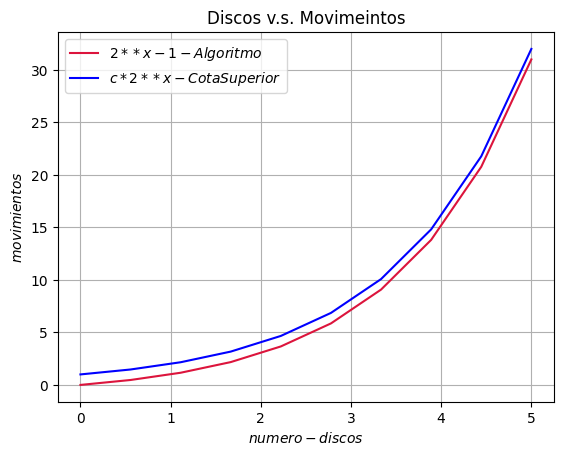

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets

def cotaSuperior(c):
  # dominio en el cual se genera la grafica
  x = np.linspace(0,5,10)
  # constante para acotar
  # c
  # cota superior asintotica
  g = (2**x)*c
  # funcion que define el comportamiento del algoritmo de Hanoi
  f = (2**x) - 1
  # se grafican ambas rectas
  plt.plot(x,f,label = '$2**x - 1-Algoritmo$', color='crimson')
  plt.plot(x,g,label = '$c * 2**x-CotaSuperior$', color='b' )
  plt.xlabel('$numero-discos$')
  plt.ylabel('$movimientos$')
  plt.title('Discos v.s. Movimeintos')
  plt.grid()
  plt.legend()

interact(cotaSuperior, c=widgets.IntSlider(min=-1,max=3,step=1,value=1))

## Interpretación
Ya con ambas graficas es evidente que como lo indica la definición, la cota superior asintótica es una función que siempre sera mayor o igual que la función que describe el comportamiento del algoritmo analizado. Además podemos notar que la $c$ que se da en la definición es un "comodín" que sirve para desplazar $g(x)$ de tal manera que sea la función que acote de manera justa la función asociada al algoritmo $f(x)$.

# ¿Para qué me sirve conocer a que orden de complejidad al que pertenece un algoritmo?

Ya que conocemos la cota superior asintótica, es decir el orden de complejidad al que pertenece este algoritmo podemos resolver las dudas planteadas inicialmente. Por ejemplo, ¿tiene sentido intentar resolver este problema para **25 discos**?. Supongamos que tenemos una computadora que realiza **un movimiento de disco por segundo** (en realidad las computadoras actuales realizan millones de operaciones por segundo) entonces ya que conocemos la cota podemos asumir que para 25 discos.

$$\begin{array}{ccc}
T\left(n\right)=T\left(25\right)=2^{25}-1 & = & 3.3554431\times10{{}^7}\qquad segundos\\
3.3554431\times10{{}^7}\qquad segundos & = & 9.320675278\times10{{}^3}\qquad horas\\
9.320675278\times10{{}^3}\qquad horas & = & 3.883614699\times10{{}^2}\qquad d\acute{\imath}as\\
3.883614699\times10{{}^2}\qquad d\acute{\imath}as & = & 1\qquad a\tilde{n}o!!!
\end{array}$$

Pero.....¿Qué se puede decir con respecto a la cota superior asintótica respecto a la memoria?.

¿La versión recursiva e iterativa de este algoritmo pertenecen a los mismos ordenes de complejidad tanto en **tiempo (operaciones)**, como en **espacio (memoria)**?.

# Conclusiones del análisis

Reuniendo todo lo visto en las 2 primeras clases podemos responder casi todas las preguntas planteadas inicialmente.

Por ejemplo, **¿tiene sentido emplear este algoritmo para resolver este problema con 25 discos?.**

De tal manera que es evidente que la respuesta es **¡no!**, a pesar de ser el mejor algoritmo para el problema de las torres de Hanoi, intentar usar este algoritmo para una cantidad mayor o igual a 25 discos, tomará mas de un año para que devuelva un resultado. Así que de hoy en adelante sabemos que antes de emplear algún algoritmo es buena idea tomarse un poco de tiempo para analizarlo y poder determinar si es una buena solución al problema inicial.

# Referencias  

*   Thomas H. Cormen, Introduction to Algorithms.
*   Libro Web, Introduccion a Python.
*   Daniel T. Joyce, Object-Oriented Data Structures.
*   John C. Mitchell, Concepts in programing Languages.
*   [Hanoi en linea](https://www.mathplayground.com/logic_tower_of_hanoi.html).